### 算法思想：
以空间中K个点为中心进行聚类，对最靠近他们的对象归类，通过迭代的方法，逐次更新各聚类中心。  

### 算法步骤：
1、随机选择k个类的初始中心；  
2、在迭代的过程中，对任意一个样本，计算其到各个衷心的距离，把该样本归到距离最近的中心所在的类；  
3、利用均值等方式更新该类的中心值；  
4、对于所有的k个聚类中心，如果利用2和3的迭代更新后，其值保持不变，那么迭代停止。

In [53]:
import os, sys
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
import scipy
import cv2
from scipy import io as spio

In [54]:
def readData(fileName):
    data = spio.loadmat(fileName)
    X = data["X"]
    return X

In [55]:
def findClosestCentroids(X, initial_centroids):
    m = X.shape[0]                  # 数据条数
    K = initial_centroids.shape[0]  # 类的总数
    dis = np.zeros((m,K))           # 存储计算每个点分别到K个类的距离
    idx = np.zeros((m,1))           # 要返回的每条数据属于哪个类
    '''计算每个点到每个类中心的距离'''
    for i in range(m):
        for j in range(K):
            dis[i,j] = np.dot((X[i,:]-initial_centroids[j,:]).reshape(1,-1),(X[i,:]-initial_centroids[j,:]).reshape(-1,1))
            
    '''返回dis每一行的最小值对应的列号，即为对应的类别
    - np.min(dis, axis=1)返回每一行的最小值
    - np.where(dis == np.min(dis, axis=1).reshape(-1,1)) 返回对应最小值的坐标
     - 注意：可能最小值对应的坐标有多个，where都会找出来，所以返回时返回前m个需要的即可（因为对于多个最小值，属于哪个类别都可以）
    '''  
    dummy,idx = np.where(dis == np.min(dis, axis=1).reshape(-1,1))
    return idx[0:dis.shape[0]]  # 注意截取一下

In [56]:
# 计算类中心
def computerCentroids(X,idx,K):
    n = X.shape[1]
    centroids = np.zeros((K,n))
    for i in range(K):
        centroids[i,:] = np.mean(X[np.ravel(idx==i),:], axis=0).reshape(1,-1)   # 索引要是一维的,axis=0为每一列，idx==i一次找出属于哪一类的，然后计算均值
    return centroids

In [57]:
# 聚类算法
def runKMeans(X,initial_centroids,max_iters,plot_process):
    m,n = X.shape                   # 数据条数和维度
    K = initial_centroids.shape[0]  # 类数
    centroids = initial_centroids   # 记录当前类中心
    previous_centroids = centroids  # 记录上一次类中心
    idx = np.zeros((m,1))           # 每条数据属于哪个类
    
    for i in range(max_iters):      # 迭代次数
        #print(u'迭代计算次数：%d'%(i+1))
        idx = findClosestCentroids(X, centroids)
        if plot_process:    # 如果绘制图像
            plt = plotProcessKMeans(X,centroids,previous_centroids) # 画聚类中心的移动过程
            previous_centroids = centroids  # 重置
        centroids = computerCentroids(X, idx, K)    # 重新计算类中心
    if plot_process:    # 显示最终的绘制结果
        plt.show()
    return centroids,idx    # 返回聚类中心和数据属于哪个类

In [58]:
# 画图，聚类中心的移动过程        
def plotProcessKMeans(X,centroids,previous_centroids):
    plt.scatter(X[:,0], X[:,1])     # 原数据的散点图
    plt.plot(previous_centroids[:,0],previous_centroids[:,1],'rx',markersize=10,linewidth=5.0)  # 上一次聚类中心
    plt.plot(centroids[:,0],centroids[:,1],'rx',markersize=10,linewidth=5.0)                    # 当前聚类中心
    for j in range(centroids.shape[0]): # 遍历每个类，画类中心的移动直线
        p1 = centroids[j,:]
        p2 = previous_centroids[j,:]
        plt.plot([p1[0],p2[0]],[p1[1],p2[1]],"->",linewidth=2.0)
    return plt


# 初始化类中心--随机取K个点作为聚类中心
def kMeansInitCentroids(X,K):
    m = X.shape[0]
    m_arr = np.arange(0,m)      # 生成0-m-1
    centroids = np.zeros((K,X.shape[1]))
    np.random.shuffle(m_arr)    # 打乱m_arr顺序    
    rand_indices = m_arr[:K]    # 取前K个
    centroids = X[rand_indices,:]
    return centroids

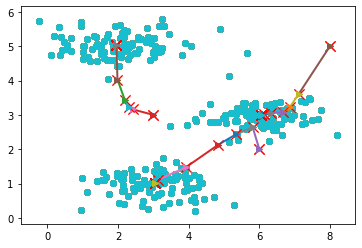

K-Means压缩图片


K-Means运行结束


压缩图片...

绘制图片...



/Users/bingao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 21407 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bingao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 20808 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bingao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bingao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29255 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/bingao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 21407 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/bingao/opt/anaconda3/lib/python3.7/site-packages/matplo

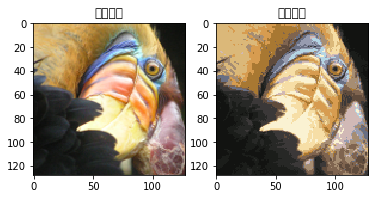

运行结束！


In [59]:
X = readData('./data/data.mat')
K = 3
initial_centroids = np.array([[3,3],[6,2],[8,5]])   # 初始化类中心
max_iters = 20
runKMeans(X,initial_centroids,max_iters,True)       # 执行K-Means聚类算法
'''
图片压缩
'''
print(u'K-Means压缩图片\n')
img_data = cv2.imread("./data/bird.png")  # 读取图片像素数据
img_data = cv2.cvtColor(img_data,cv2.COLOR_BGR2RGB)
img_data = img_data/255.0             # 像素值映射到0-1
img_size = img_data.shape
X = img_data.reshape(img_size[0]*img_size[1],3)    # 调整为N*3的矩阵，N是所有像素点个数
K = 16
max_iters = 5
initial_centroids = kMeansInitCentroids(X,K)
centroids,idx = runKMeans(X, initial_centroids, max_iters, False)
print(u'\nK-Means运行结束\n')
print(u'\n压缩图片...\n')
idx = findClosestCentroids(X, centroids)
X_recovered = centroids[idx,:]
X_recovered = X_recovered.reshape(img_size[0],img_size[1],3)

print(u'绘制图片...\n')
plt.subplot(1,2,1)
plt.imshow(img_data)
plt.title(u"原先图片")
plt.subplot(1,2,2)
plt.imshow(X_recovered)
plt.title(u"压缩图像")
plt.show()
print(u'运行结束！')